In [1]:
#355c70 blue
#ff5a5e darker pink
#C06C85
#f67280 pink
#F8B195 light orange
#analysis 
import numpy as np
import pandas as pd
import re
from matplotlib import pyplot as plt
#plt.style.use('ggplot')
import seaborn as sns
import scipy.stats as stats

In [2]:
#read in the csv file

foxydf = pd.read_csv('nbt_fiche.csv', 
                     delimiter=',', 
                     names=["Comment_number",
                            "User_number",
                            "Date_of_comment",
                            "Proof_of_payment",
                            "Platform_ID",
                            "Platform",
                            "Nested_comment",
                            "Rating",
                            "Comment"])
foxydf.sample(5)

#verify the datatypes
#Length: 153266

#foxydf.dtypes

,Comment_number,User_number,Date_of_comment,Proof_of_payment,Platform_ID,Platform,Nested_comment,Rating,Comment
67669,184932,39839,2016-03-14 14:28:40,0,7576,fastconnectbux,0,0,"<span class=""chSta"">fastconnectbux passe au st..."
149861,369397,85119,2018-03-01 04:07:12,0,25831,BestBux.Net,0,5,Ne pas oublier que le propriétaire du site lui...
89812,227170,66306,2016-10-06 09:53:59,1,8913,FeaturePoints,0,5,"Mon 1er Paiement, environ 12H après ma demande"
90088,227684,38653,2016-10-09 12:04:40,0,15751,GBonus,227675,0,Tout simplement un type de boîte mails interdi...
121350,288168,90300,2017-06-03 19:45:30,0,3533,Mon Opinion Compte,287556,0,Je suis d'acord avec toi lolalola ils viennent...


In [3]:
#code to clean html tags
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)

#fix error "expected string or bytes-like object"
foxydf.Comment = foxydf.Comment.astype(str)

#apply function
foxydf['comment_clean'] = foxydf.Comment.apply(remove_tags)
foxydf.comment_clean.head(5)

0    et tu arrives à appeler en Finlande et en Polo...
1    De très nombreuses plaintes et insultes dans l...
2    SurfEnOr passe au statut fermé.Raison : Site f...
3    goldminebux passe au statut fermé.Raison : Sit...
4    wild-bux passe au statut fermé.Raison : Site f...
Name: comment_clean, dtype: object

In [4]:
#foxydf.loc[foxydf['Platform'] == 'Clicksense']
#foxydf[foxydf['comment_clean'].str.contains('passe au statut fermé')]

In [5]:
#drop those mentioning closure
foxydf = foxydf[~foxydf['comment_clean'].str.contains('passe au statut fermé')]
#foxydf

In [6]:
# write the data to csv for viewing
#foxydf.to_csv('foxydf_147433.csv')

In [7]:
#drop nested comment
df = foxydf.drop(foxydf[foxydf.Nested_comment > 0].index)

#save file
#df.to_csv('foxydf_65274.csv')

In [8]:
#drop comments mentioning status change (1935 rows)
df = df[~df['comment_clean'].str.contains('passe au statut')]
#df.to_csv('foxydf_63359.csv')

In [9]:
#drop comments of admin
df = df.drop(df[df.User_number == 2].index)
#df_drop

In [10]:
#To select rows whose column value equals a scalar, some_value, use ==:
#df.loc[df['favorite_color'] == 'yellow']

df.comment_clean

1         De très nombreuses plaintes et insultes dans l...
7         Bonjour à tous, \r\n\r\nToluna est une société...
8         zouzitta vous avez dit que le site ne payer pa...
9         Si vous télécharger l'application et que vous ...
10        Y'a bien un webmaster sur le site.\r\nRéponse ...
                                ...                        
153261    sacrée dégringolade dans les gains pas mal de ...
153262    J'ai oublié de témoigner de mes gains du mois ...
153263    jai pas resue mon paiment de 3.05$us,sur mon c...
153264    why my acoount is suspended . i didn't do anyt...
153265    Paiement reçu.Merci Ba-Click toujours  aussi f...
Name: comment_clean, Length: 63291, dtype: object

In [11]:
df.User_number.value_counts()
#one user can rate several times for a platform

1946     1562
39989     743
6561      688
37149     579
3960      537
         ... 
73038       1
34141       1
91489       1
68473       1
71677       1
Name: User_number, Length: 10005, dtype: int64

In [12]:
#find 
df[df['comment_clean'].str.contains('\r\n')]

,Comment_number,User_number,Date_of_comment,Proof_of_payment,Platform_ID,Platform,Nested_comment,Rating,Comment,comment_clean
7,87449,35586,2014-10-17 15:47:57,0,713,Toluna,0,5,"Bonjour à tous, <br />\r\n<br />\r\nToluna est...","Bonjour à tous, \r\n\r\nToluna est une société..."
8,87448,29236,2014-10-17 15:41:37,0,8972,Gift Hunter Club,0,5,zouzitta vous avez dit que le site ne payer pa...,zouzitta vous avez dit que le site ne payer pa...
9,62836,6561,2014-01-14 20:44:05,0,10985,Shopmium,0,0,Si vous télécharger l'application et que vous ...,Si vous télécharger l'application et que vous ...
10,113137,38143,2015-03-07 07:08:29,0,6146,crocokado,0,3,Y'a bien un webmaster sur le site.<br />\r\nRé...,Y'a bien un webmaster sur le site.\r\nRéponse ...
17,128719,26431,2015-05-22 01:46:57,0,12371,Ça vaut le coup !,0,3,"Bonsoir, petite nouvelle, toujours pas de chèq...","Bonsoir, petite nouvelle, toujours pas de chèq..."
...,...,...,...,...,...,...,...,...,...,...
153240,378271,112213,2018-04-12 13:20:36,0,16183,QuickThoughts,0,5,J'ai gagné 6&euro; depuis le 04/03<br />\r\nAu...,J'ai gagné 6&euro; depuis le 04/03\r\nAu bout ...
153256,378284,114079,2018-04-12 14:20:03,0,14791,Ba-Click,0,1,ce site n'est plus sérieux depuis le changemen...,ce site n'est plus sérieux depuis le changemen...
153258,378293,114917,2018-04-12 15:52:26,0,14791,Ba-Click,0,5,Très bon site et sérieux.<br />\r\nVoici mon l...,Très bon site et sérieux.\r\nVoici mon lien de...
153259,378295,83508,2018-04-12 16:05:11,0,26055,ZaniBet,0,5,ZaniBet est une application totalement gratuit...,ZaniBet est une application totalement gratuit...


In [13]:
#clean new line characters
df.comment_clean = df.comment_clean.str.replace('\r\n', ' ',)
#check again
#df_drop[df_drop['comment_clean'].str.contains('\r')]

In [14]:
df[df['comment_clean'].str.contains('\r')]

,Comment_number,User_number,Date_of_comment,Proof_of_payment,Platform_ID,Platform,Nested_comment,Rating,Comment,comment_clean


In [15]:
#df.to_csv('foxydf_63291.csv')

In [16]:
#find 
df[df['comment_clean'].str.contains('span')]

,Comment_number,User_number,Date_of_comment,Proof_of_payment,Platform_ID,Platform,Nested_comment,Rating,Comment,comment_clean
16220,89510,35946,2014-11-04 10:45:29,0,11032,Opiniometrie,0,1,"Je suis inscrite sur Opiniométrie, Avis de fem...","Je suis inscrite sur Opiniométrie, Avis de fem..."
22595,102707,26934,2015-01-27 11:54:29,0,6097,AvisPanel,0,3,"Bonjour,<br />\r\n<br />\r\nEn tant que fidèle...","Bonjour, En tant que fidèle sur de très nombr..."


In [17]:
#check
df.comment_clean[50]

"Paiement reçu aujourd'hui de 5&euro;43. Merci admin."

In [18]:
df.comment_clean = df.comment_clean.str.replace('&euro;', '€',)

In [19]:
df.comment_clean

1         De très nombreuses plaintes et insultes dans l...
7         Bonjour à tous,   Toluna est une société inter...
8         zouzitta vous avez dit que le site ne payer pa...
9         Si vous télécharger l'application et que vous ...
10        Y'a bien un webmaster sur le site. Réponse à m...
                                ...                        
153261    sacrée dégringolade dans les gains pas mal de ...
153262    J'ai oublié de témoigner de mes gains du mois ...
153263    jai pas resue mon paiment de 3.05$us,sur mon c...
153264    why my acoount is suspended . i didn't do anyt...
153265    Paiement reçu.Merci Ba-Click toujours  aussi f...
Name: comment_clean, Length: 63291, dtype: object

In [20]:
#check user
#df.loc[df['User_number'] == 6561]
df.User_number.value_counts()

1946     1562
39989     743
6561      688
37149     579
3960      537
         ... 
73038       1
34141       1
91489       1
68473       1
71677       1
Name: User_number, Length: 10005, dtype: int64

In [21]:
#check user
df.loc[df['User_number'] == 29]

,Comment_number,User_number,Date_of_comment,Proof_of_payment,Platform_ID,Platform,Nested_comment,Rating,Comment,comment_clean
55662,159377,29,2015-10-20 11:39:45,0,11299,AvisConso.com,0,3,Bjr Lucas<br />\r\nA lire <br />\r\nAvis Conso...,Bjr Lucas A lire Avis Conso : difficile d'êtr...
137815,335313,29,2017-10-17 16:39:40,0,13082,O'Pignon-Marketing,0,5,Les inscriptions sont de nouveau ouvertes - l...,Les inscriptions sont de nouveau ouvertes - l...
137820,335322,29,2017-10-17 17:00:02,0,329,Ipsos i-Say,0,5,RECU !!! cheque cadeau amazon. Toujours aussi ...,RECU !!! cheque cadeau amazon. Toujours aussi ...


In [22]:
df.Platform.value_counts()

Ba-Click        3620
Click-It        2780
YouPass         2090
ClixSense       2039
MegaClic        1103
                ... 
ncobux             1
nexusads           1
StrongPTC          1
KoraBux            1
ethereumclix       1
Name: Platform, Length: 3929, dtype: int64

In [23]:
#CREATE DATE AND TIME OF COMMENTS
import datetime
import time

#df['date_time_obj'] = df.Date_of_comment.astype(str)

#date_time_str = df.Date_of_comment[10]
# date_time_obj1 = datetime.datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S')

# print('Date:', date_time_obj1.date())
# print('Time:', date_time_obj1.time())
# print('Date-time:', date_time_obj1)

df.Date_of_comment[10]

'2015-03-07 07:08:29'

In [24]:
df['date']= pd.to_datetime(df['Date_of_comment'])

In [25]:
df['date'] = df['date'].apply(lambda x:x.date().strftime('%Y-%m-%d'))

In [26]:
df['time_of_comment']= pd.to_datetime(df['Date_of_comment'])

In [27]:
df['time_of_comment'] = df['time_of_comment'].apply(lambda x:x.time().strftime('%H:%M:%S'))

In [28]:
df['year'] = pd.DatetimeIndex(df['Date_of_comment']).year

In [29]:
df['time'] = pd.DatetimeIndex(df['Date_of_comment']).time

In [30]:
df['month'] = pd.DatetimeIndex(df['Date_of_comment']).month
#df.head()

In [31]:
df['month_name'] = pd.DatetimeIndex(df['Date_of_comment']).month_name()
df.head()

,Comment_number,User_number,Date_of_comment,Proof_of_payment,Platform_ID,Platform,Nested_comment,Rating,Comment,comment_clean,date,time_of_comment,year,time,month,month_name
1,64766,26177,2014-02-12 16:55:01,0,10282,Kronocash,0,3,De très nombreuses plaintes et insultes dans l...,De très nombreuses plaintes et insultes dans l...,2014-02-12,16:55:01,2014,16:55:01,2,February
7,87449,35586,2014-10-17 15:47:57,0,713,Toluna,0,5,"Bonjour à tous, <br />\r\n<br />\r\nToluna est...","Bonjour à tous, Toluna est une société inter...",2014-10-17,15:47:57,2014,15:47:57,10,October
8,87448,29236,2014-10-17 15:41:37,0,8972,Gift Hunter Club,0,5,zouzitta vous avez dit que le site ne payer pa...,zouzitta vous avez dit que le site ne payer pa...,2014-10-17,15:41:37,2014,15:41:37,10,October
9,62836,6561,2014-01-14 20:44:05,0,10985,Shopmium,0,0,Si vous télécharger l'application et que vous ...,Si vous télécharger l'application et que vous ...,2014-01-14,20:44:05,2014,20:44:05,1,January
10,113137,38143,2015-03-07 07:08:29,0,6146,crocokado,0,3,Y'a bien un webmaster sur le site.<br />\r\nRé...,Y'a bien un webmaster sur le site. Réponse à m...,2015-03-07,07:08:29,2015,07:08:29,3,March


In [32]:
df['month_year'] = pd.to_datetime(df['Date_of_comment']).dt.to_period('M')
df.head()

,Comment_number,User_number,Date_of_comment,Proof_of_payment,Platform_ID,Platform,Nested_comment,Rating,Comment,comment_clean,date,time_of_comment,year,time,month,month_name,month_year
1,64766,26177,2014-02-12 16:55:01,0,10282,Kronocash,0,3,De très nombreuses plaintes et insultes dans l...,De très nombreuses plaintes et insultes dans l...,2014-02-12,16:55:01,2014,16:55:01,2,February,2014-02
7,87449,35586,2014-10-17 15:47:57,0,713,Toluna,0,5,"Bonjour à tous, <br />\r\n<br />\r\nToluna est...","Bonjour à tous, Toluna est une société inter...",2014-10-17,15:47:57,2014,15:47:57,10,October,2014-10
8,87448,29236,2014-10-17 15:41:37,0,8972,Gift Hunter Club,0,5,zouzitta vous avez dit que le site ne payer pa...,zouzitta vous avez dit que le site ne payer pa...,2014-10-17,15:41:37,2014,15:41:37,10,October,2014-10
9,62836,6561,2014-01-14 20:44:05,0,10985,Shopmium,0,0,Si vous télécharger l'application et que vous ...,Si vous télécharger l'application et que vous ...,2014-01-14,20:44:05,2014,20:44:05,1,January,2014-01
10,113137,38143,2015-03-07 07:08:29,0,6146,crocokado,0,3,Y'a bien un webmaster sur le site.<br />\r\nRé...,Y'a bien un webmaster sur le site. Réponse à m...,2015-03-07,07:08:29,2015,07:08:29,3,March,2015-03


In [33]:
# add no of times rated
df['month_year_count'] = df.groupby(['month_year'])['month_name'].transform('count')
df.sample(5)

,Comment_number,User_number,Date_of_comment,Proof_of_payment,Platform_ID,Platform,Nested_comment,Rating,Comment,comment_clean,date,time_of_comment,year,time,month,month_name,month_year,month_year_count
123393,292988,90896,2017-06-19 22:56:09,1,17892,GPTBonus,0,5,Et encore 1&euro; !,Et encore 1€ !,2017-06-19,22:56:09,2017,22:56:09,6,June,2017-06,1330
10948,81175,14483,2014-09-05 20:44:09,1,11948,Clear Bux,0,4,Bonsoir<br />\r\n<br />\r\nPaiement de 2.89$ d...,Bonsoir Paiement de 2.89$ demandé le 05/09/20...,2014-09-05,20:44:09,2014,20:44:09,9,September,2014-09,1278
60989,168400,10649,2015-12-14 19:34:36,0,6628,vEuro,0,0,Mails des admins : <br />\r\n<br />\r\naujourd...,"Mails des admins : aujourd'hui, nous avons p...",2015-12-14,19:34:36,2015,19:34:36,12,December,2015-12,1266
110772,266942,44471,2017-03-27 21:58:10,0,12501,GTPN1,0,0,"Bonjour, merci pour le code","Bonjour, merci pour le code",2017-03-27,21:58:10,2017,21:58:10,3,March,2017-03,1436
1463,63726,17070,2014-01-28 00:22:10,1,9674,RevolutionPTC,0,5,bonsoir<br />\r\n<br />\r\nVotre demande de pa...,bonsoir Votre demande de paiement : 0.59 € a ...,2014-01-28,00:22:10,2014,00:22:10,1,January,2014-01,846


In [34]:
# count
df['year_count'] = df.groupby(['year'])['Rating'].transform('count')
df.sample(2)

,Comment_number,User_number,Date_of_comment,Proof_of_payment,Platform_ID,Platform,Nested_comment,Rating,Comment,comment_clean,date,time_of_comment,year,time,month,month_name,month_year,month_year_count,year_count
6790,73804,29391,2014-06-13 07:31:27,1,10033,InstaGC,0,5,"Day Online Solutions, LLC vient de vous envoye...","Day Online Solutions, LLC vient de vous envoye...",2014-06-13,07:31:27,2014,07:31:27,6,June,2014-06,984,13093
52325,153449,6466,2015-09-18 21:01:26,1,4284,SmileysPTC,0,5,"30&euro; biens reçu.<br />\r\nMerci Admin, trè...","30€ biens reçu. Merci Admin, très sérieux.",2015-09-18,21:01:26,2015,21:01:26,9,September,2015-09,1257,15624


In [35]:
# # count
# df['month_count'] = df.groupby(['year'])[''].transform('count')
# df.sample(2)

In [36]:
# fig, ax = plt.subplots()
# fig.set_size_inches((12,6))
# sns.lineplot(x='year',y='year_count',data=df,ax=ax)
# plt.show()

In [37]:
df['week_day_name'] = pd.DatetimeIndex(df['Date_of_comment']).day_name()
df.head()

,Comment_number,User_number,Date_of_comment,Proof_of_payment,Platform_ID,Platform,Nested_comment,Rating,Comment,comment_clean,date,time_of_comment,year,time,month,month_name,month_year,month_year_count,year_count,week_day_name
1,64766,26177,2014-02-12 16:55:01,0,10282,Kronocash,0,3,De très nombreuses plaintes et insultes dans l...,De très nombreuses plaintes et insultes dans l...,2014-02-12,16:55:01,2014,16:55:01,2,February,2014-02,775,13093,Wednesday
7,87449,35586,2014-10-17 15:47:57,0,713,Toluna,0,5,"Bonjour à tous, <br />\r\n<br />\r\nToluna est...","Bonjour à tous, Toluna est une société inter...",2014-10-17,15:47:57,2014,15:47:57,10,October,2014-10,2526,13093,Friday
8,87448,29236,2014-10-17 15:41:37,0,8972,Gift Hunter Club,0,5,zouzitta vous avez dit que le site ne payer pa...,zouzitta vous avez dit que le site ne payer pa...,2014-10-17,15:41:37,2014,15:41:37,10,October,2014-10,2526,13093,Friday
9,62836,6561,2014-01-14 20:44:05,0,10985,Shopmium,0,0,Si vous télécharger l'application et que vous ...,Si vous télécharger l'application et que vous ...,2014-01-14,20:44:05,2014,20:44:05,1,January,2014-01,846,13093,Tuesday
10,113137,38143,2015-03-07 07:08:29,0,6146,crocokado,0,3,Y'a bien un webmaster sur le site.<br />\r\nRé...,Y'a bien un webmaster sur le site. Réponse à m...,2015-03-07,07:08:29,2015,07:08:29,3,March,2015-03,1343,15624,Saturday


In [38]:
#df['week_day'] = pd.DatetimeIndex(df['Date_of_comment']).weekday
#df.head()

In [39]:
#save origin
df_origin = df

In [40]:
#check user
df.loc[df['year'] == 2017]

,Comment_number,User_number,Date_of_comment,Proof_of_payment,Platform_ID,Platform,Nested_comment,Rating,Comment,comment_clean,date,time_of_comment,year,time,month,month_name,month_year,month_year_count,year_count,week_day_name
77,314716,24024,2017-08-04 11:57:21,1,11862,CashPirate,0,5,2.50$ Paypal.<br />\r\nreçu commandé et reçu e...,2.50$ Paypal. reçu commandé et reçu en 30 seco...,2017-08-04,11:57:21,2017,11:57:21,8,August,2017-08,1356,16064,Friday
112,314720,26239,2017-08-04 12:06:36,0,14791,Ba-Click,0,0,mdr<br />\r\nles sondages c'est la vie,mdr les sondages c'est la vie,2017-08-04,12:06:36,2017,12:06:36,8,August,2017-08,1356,16064,Friday
22662,256288,81567,2017-02-21 05:36:03,1,13222,Moolineo,0,0,Hop un autre gain Moolineo 42.35&euro; ^^,Hop un autre gain Moolineo 42.35€ ^^,2017-02-21,05:36:03,2017,05:36:03,2,February,2017-02,1331,16064,Tuesday
22665,256291,56196,2017-02-21 07:08:26,0,20626,AlloetBtc Audiotel & Bitcoin,0,4,Merci à Axel pour sa disponibilité et sa réact...,Merci à Axel pour sa disponibilité et sa réact...,2017-02-21,07:08:26,2017,07:08:26,2,February,2017-02,1331,16064,Tuesday
22666,256508,81831,2017-02-21 18:59:57,1,21366,Make Money - Earn Cash,0,5,Bonjour à tous! Cette application est juste au...,Bonjour à tous! Cette application est juste au...,2017-02-21,18:59:57,2017,18:59:57,2,February,2017-02,1331,16064,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144877,354629,74572,2017-12-31 18:30:14,0,49,ClixSense,0,5,Je souhaite une excellente année à toutes et a...,Je souhaite une excellente année à toutes et a...,2017-12-31,18:30:14,2017,18:30:14,12,December,2017-12,1169,16064,Sunday
144878,354630,10541,2017-12-31 18:33:36,0,81,Donjons & Trésors,0,5,"Site tres serieux, deja prit 1 paiement. Exist...","Site tres serieux, deja prit 1 paiement. Exist...",2017-12-31,18:33:36,2017,18:33:36,12,December,2017-12,1169,16064,Sunday
144881,354634,103735,2017-12-31 18:47:25,1,24050,Boo-Click,0,4,Nouveau gain reçus pour terminer l'année merci...,Nouveau gain reçus pour terminer l'année merci...,2017-12-31,18:47:25,2017,18:47:25,12,December,2017-12,1169,16064,Sunday
144885,354662,79436,2017-12-31 20:52:25,1,14791,Ba-Click,0,5,"10? reçu avec un peu de retard, mais on en veu...","10? reçu avec un peu de retard, mais on en veu...",2017-12-31,20:52:25,2017,20:52:25,12,December,2017-12,1169,16064,Sunday


In [41]:
df = df.drop(df[df.Rating == 0].index)

In [42]:
df

,Comment_number,User_number,Date_of_comment,Proof_of_payment,Platform_ID,Platform,Nested_comment,Rating,Comment,comment_clean,date,time_of_comment,year,time,month,month_name,month_year,month_year_count,year_count,week_day_name
1,64766,26177,2014-02-12 16:55:01,0,10282,Kronocash,0,3,De très nombreuses plaintes et insultes dans l...,De très nombreuses plaintes et insultes dans l...,2014-02-12,16:55:01,2014,16:55:01,2,February,2014-02,775,13093,Wednesday
7,87449,35586,2014-10-17 15:47:57,0,713,Toluna,0,5,"Bonjour à tous, <br />\r\n<br />\r\nToluna est...","Bonjour à tous, Toluna est une société inter...",2014-10-17,15:47:57,2014,15:47:57,10,October,2014-10,2526,13093,Friday
8,87448,29236,2014-10-17 15:41:37,0,8972,Gift Hunter Club,0,5,zouzitta vous avez dit que le site ne payer pa...,zouzitta vous avez dit que le site ne payer pa...,2014-10-17,15:41:37,2014,15:41:37,10,October,2014-10,2526,13093,Friday
10,113137,38143,2015-03-07 07:08:29,0,6146,crocokado,0,3,Y'a bien un webmaster sur le site.<br />\r\nRé...,Y'a bien un webmaster sur le site. Réponse à m...,2015-03-07,07:08:29,2015,07:08:29,3,March,2015-03,1343,15624,Saturday
11,113157,38662,2015-03-07 11:24:33,0,3533,Mon Opinion Compte,0,3,"Bonjour, c'est un super site mais est-il norma...","Bonjour, c'est un super site mais est-il norma...",2015-03-07,11:24:33,2015,11:24:33,3,March,2015-03,1343,15624,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153261,378298,101018,2018-04-12 16:21:50,0,9138,MegaClic,0,5,sacrée dégringolade dans les gains pas mal de ...,sacrée dégringolade dans les gains pas mal de ...,2018-04-12,16:21:50,2018,16:21:50,4,April,2018-04,473,3874,Thursday
153262,378299,65118,2018-04-12 16:30:09,1,8718,Chtiflouz,0,5,J'ai oublié de témoigner de mes gains du mois ...,J'ai oublié de témoigner de mes gains du mois ...,2018-04-12,16:30:09,2018,16:30:09,4,April,2018-04,473,3874,Thursday
153263,378300,110559,2018-04-12 16:38:21,0,26901,Clix2018.com,0,1,"jai pas resue mon paiment de 3.05$us,sur mon c...","jai pas resue mon paiment de 3.05$us,sur mon c...",2018-04-12,16:38:21,2018,16:38:21,4,April,2018-04,473,3874,Thursday
153264,378302,107323,2018-04-12 16:57:41,0,18520,Cliquesteria,0,1,why my acoount is suspended . i didn't do anyt...,why my acoount is suspended . i didn't do anyt...,2018-04-12,16:57:41,2018,16:57:41,4,April,2018-04,473,3874,Thursday


In [43]:
df["date"] = df["date"].astype("datetime64")

In [44]:
#del df['year_of_comment']
#del df['month_year_count']
#del df['year_count']



In [45]:
del df['time']

In [46]:
df["time_of_comment"] = df["time_of_comment"].astype("datetime64")

In [47]:
# #counting and plotting status
# weekday_plot = topdf.status.value_counts()
# print(status_plot)

# status_plot.plot(kind='barh', color = '#F8B195')

In [48]:
df["date"] = df["date"].astype("datetime64")

In [49]:
#df.to_csv('nbt_fiche_clean_09052020.csv')

In [52]:
dfedit

,Comment_number,User_number,Date_of_comment,Proof_of_payment,Platform_ID,Platform,Nested_comment,Rating,Comment,comment_clean,date,time_of_comment,year,month,month_name,month_year,month_year_count,year_count,week_day_name
1,64766,26177,2014-02-12 16:55:01,0,10282,Kronocash,0,3,De très nombreuses plaintes et insultes dans l...,De très nombreuses plaintes et insultes dans l...,2014-02-12,2020-05-12 16:55:01,2014,2,February,2014-02,775,13093,Wednesday
7,87449,35586,2014-10-17 15:47:57,0,713,Toluna,0,5,"Bonjour à tous, <br />\r\n<br />\r\nToluna est...","Bonjour à tous, Toluna est une société inter...",2014-10-17,2020-05-12 15:47:57,2014,10,October,2014-10,2526,13093,Friday
8,87448,29236,2014-10-17 15:41:37,0,8972,Gift Hunter Club,0,5,zouzitta vous avez dit que le site ne payer pa...,zouzitta vous avez dit que le site ne payer pa...,2014-10-17,2020-05-12 15:41:37,2014,10,October,2014-10,2526,13093,Friday
10,113137,38143,2015-03-07 07:08:29,0,6146,crocokado,0,3,Y'a bien un webmaster sur le site.<br />\r\nRé...,Y'a bien un webmaster sur le site. Réponse à m...,2015-03-07,2020-05-12 07:08:29,2015,3,March,2015-03,1343,15624,Saturday
11,113157,38662,2015-03-07 11:24:33,0,3533,Mon Opinion Compte,0,3,"Bonjour, c'est un super site mais est-il norma...","Bonjour, c'est un super site mais est-il norma...",2015-03-07,2020-05-12 11:24:33,2015,3,March,2015-03,1343,15624,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144877,354629,74572,2017-12-31 18:30:14,0,49,ClixSense,0,5,Je souhaite une excellente année à toutes et a...,Je souhaite une excellente année à toutes et a...,2017-12-31,2020-05-12 18:30:14,2017,12,December,2017-12,1169,16064,Sunday
144878,354630,10541,2017-12-31 18:33:36,0,81,Donjons & Trésors,0,5,"Site tres serieux, deja prit 1 paiement. Exist...","Site tres serieux, deja prit 1 paiement. Exist...",2017-12-31,2020-05-12 18:33:36,2017,12,December,2017-12,1169,16064,Sunday
144881,354634,103735,2017-12-31 18:47:25,1,24050,Boo-Click,0,4,Nouveau gain reçus pour terminer l'année merci...,Nouveau gain reçus pour terminer l'année merci...,2017-12-31,2020-05-12 18:47:25,2017,12,December,2017-12,1169,16064,Sunday
144885,354662,79436,2017-12-31 20:52:25,1,14791,Ba-Click,0,5,"10? reçu avec un peu de retard, mais on en veu...","10? reçu avec un peu de retard, mais on en veu...",2017-12-31,2020-05-12 20:52:25,2017,12,December,2017-12,1169,16064,Sunday


Text(0, 0.5, 'Number of ratings')

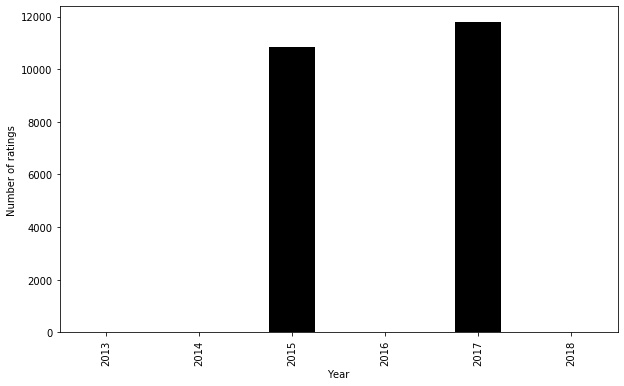

In [53]:
plt.figure(figsize=(10,6))
df.groupby(df["date"].dt.year)['Rating'].count().plot(kind='bar', color= ["#000000", "#FFFFFF"])
plt.xlabel('Year')
plt.ylabel('Number of ratings')

Text(0, 0.5, 'Month')

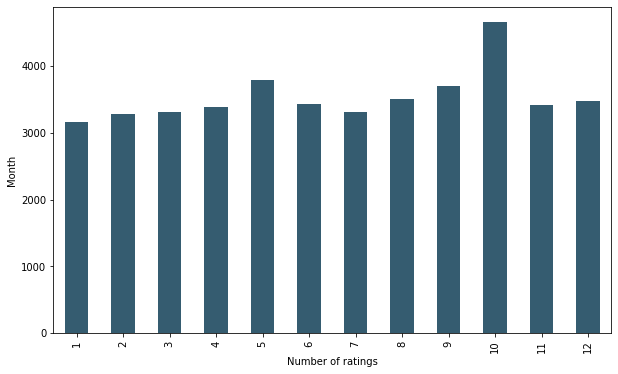

In [54]:
plt.figure(figsize=(10,6))
dfedit.groupby(dfedit["date"].dt.month)['Rating'].count().plot(kind="bar", color = '#355c70')
plt.xlabel('Number of ratings')
plt.ylabel('Month')

In [56]:
# with sns.color_palette("husl", 8): 
#     plt.figure(figsize=(10,6))
# #     ax = df.groupby(df["date"].dt.day_name())['Rating'].count().plot(kind="barh", color = '#F37450', index = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
#     plt.xlabel('Number of ratings')
#     plt.ylabel('Weekdays')

In [57]:
# count
df['week_day_count'] = df.groupby(df["date"].dt.day_name())['Rating'].transform('count')
df.sample(10)

,Comment_number,User_number,Date_of_comment,Proof_of_payment,Platform_ID,Platform,Nested_comment,Rating,Comment,comment_clean,date,time_of_comment,year,month,month_name,month_year,month_year_count,year_count,week_day_name,week_day_count
18214,93494,30005,2014-12-02 02:41:20,1,8463,Soleil13,0,5,"Bonsoir, merci au web pour le nouveau paiement...","Bonsoir, merci au web pour le nouveau paiement...",2014-12-02,2020-05-12 02:41:20,2014,12,December,2014-12,1040,13093,Tuesday,6528
145567,357424,106056,2018-01-10 00:25:49,0,25300,starpasstore,0,1,ce site n est enregistrer dans aucun pays desi...,ce site n est enregistrer dans aucun pays desi...,2018-01-10,2020-05-12 00:25:49,2018,1,January,2018-01,1113,3874,Wednesday,6534
79252,207171,39989,2016-07-07 17:39:09,1,9014,SuccessBux,0,5,Mon 7ème paiement sur ce site.<br />\r\n<br />...,Mon 7ème paiement sur ce site. Trop cool l'i...,2016-07-07,2020-05-12 17:39:09,2016,7,July,2016-07,1093,14609,Thursday,6177
67152,183760,30673,2016-03-08 20:24:59,0,9579,Ojooo,0,4,Je ne comprend pas pourquoi il est marqué comm...,Je ne comprend pas pourquoi il est marqué comm...,2016-03-08,2020-05-12 20:24:59,2016,3,March,2016-03,1028,14609,Tuesday,6528
134913,328203,28775,2017-09-23 20:51:35,0,713,Toluna,0,1,j ai demande un paiement de 20 e par paypal il...,j ai demande un paiement de 20 e par paypal il...,2017-09-23,2020-05-12 20:51:35,2017,9,September,2017-09,1291,16064,Saturday,6622
72386,193577,44835,2016-05-08 10:47:27,1,10667,caraibesland,0,5,"Bonjour, bien reçu 1 code, merci à vous, bon d...","Bonjour, bien reçu 1 code, merci à vous, bon d...",2016-05-08,2020-05-12 10:47:27,2016,5,May,2016-05,1093,14609,Sunday,6629
67540,184556,55800,2016-03-13 12:18:08,0,1671,Codes-Service,0,2,J'ai beaucoup aimé ce site mais malheureusemen...,J'ai beaucoup aimé ce site mais malheureusemen...,2016-03-13,2020-05-12 12:18:08,2016,3,March,2016-03,1028,14609,Sunday,6629
122311,290746,64208,2017-06-11 17:29:38,1,14791,Ba-Click,0,5,Énièmes paiement reçu merci encore,Énièmes paiement reçu merci encore,2017-06-11,2020-05-12 17:29:38,2017,6,June,2017-06,1330,16064,Sunday,6629
60653,167838,23603,2015-12-11 03:18:35,1,12501,GTPN1,0,5,Tres bon site! Encore et encore un paiement!!,Tres bon site! Encore et encore un paiement!!,2015-12-11,2020-05-12 03:18:35,2015,12,December,2015-12,1266,15624,Friday,6227
110953,267299,25237,2017-03-29 11:37:52,0,1151,Fisho-Kdos,0,5,"bonjour à tous ,oui je pense aussi que le stat...","bonjour à tous ,oui je pense aussi que le stat...",2017-03-29,2020-05-12 11:37:52,2017,3,March,2017-03,1436,16064,Wednesday,6534


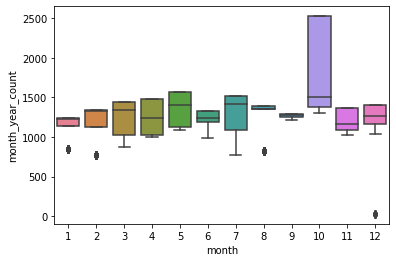

In [58]:
sns.boxplot(x="month", y="month_year_count", data=dfedit, palette="husl")


In [59]:
m_plot = df.groupby('month_year')['month_year_count'].mean()
#m_plot

In [60]:
# m_name_plot = pd.DatetimeIndex(m_plot).month_name()
# m_name_plot

monthdf = {'count':m_plot}
monthdf = pd.DataFrame(monthdf)
#monthdf.to_csv('foxy_month_year_plot.csv')

In [61]:
monthdf = pd.read_csv('foxy_month_year_plot.csv', 
                     delimiter=',')
monthdf.sample(5)

,month_year,count
41,2017-05,1569
45,2017-09,1291
18,2015-06,1242
15,2015-03,1343
35,2016-11,1368


In [62]:
monthdf['month_year'] =  pd.to_datetime(monthdf['month_year'], format='%Y-%m')
monthdf.dtypes

month_year    datetime64[ns]
count                  int64
dtype: object

In [63]:
monthdf['year'] = pd.DatetimeIndex(monthdf['month_year']).year

In [64]:
monthdf['month'] = pd.DatetimeIndex(monthdf['month_year']).month_name()
#monthdf

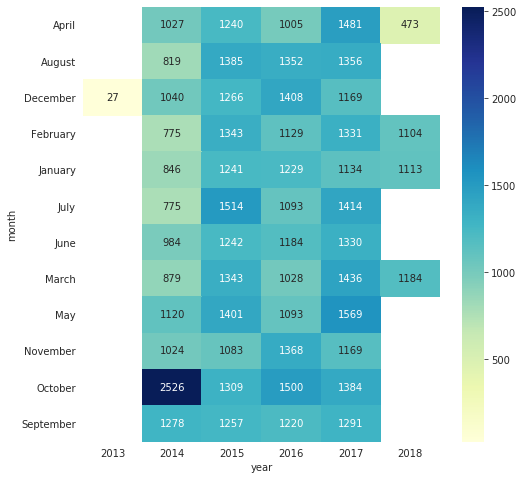

In [65]:
with sns.axes_style("white"):
    fig, ax = plt.subplots(figsize=(8,8)) 
    mplot = monthdf.pivot("month", "year", "count")
    ax = sns.heatmap(mplot, cmap="YlGnBu", annot=True, fmt='g')
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)

In [ ]:
with sns.axes_style("white"):
    fig, ax = plt.subplots(figsize=(10,10)) 
    mplot = monthdf.pivot("month", "year", "count")
    mplot.index = pd.CategoricalIndex(mplot.index, categories= ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"])
    mplot.sort_index(level=0, inplace=True)
    ax = sns.heatmap(mplot, cmap="YlGnBu", annot=True, fmt='g')
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)    
    

In [66]:
df

,Comment_number,User_number,Date_of_comment,Proof_of_payment,Platform_ID,Platform,Nested_comment,Rating,Comment,comment_clean,date,time_of_comment,year,month,month_name,month_year,month_year_count,year_count,week_day_name,week_day_count
1,64766,26177,2014-02-12 16:55:01,0,10282,Kronocash,0,3,De très nombreuses plaintes et insultes dans l...,De très nombreuses plaintes et insultes dans l...,2014-02-12,2020-05-12 16:55:01,2014,2,February,2014-02,775,13093,Wednesday,6534
7,87449,35586,2014-10-17 15:47:57,0,713,Toluna,0,5,"Bonjour à tous, <br />\r\n<br />\r\nToluna est...","Bonjour à tous, Toluna est une société inter...",2014-10-17,2020-05-12 15:47:57,2014,10,October,2014-10,2526,13093,Friday,6227
8,87448,29236,2014-10-17 15:41:37,0,8972,Gift Hunter Club,0,5,zouzitta vous avez dit que le site ne payer pa...,zouzitta vous avez dit que le site ne payer pa...,2014-10-17,2020-05-12 15:41:37,2014,10,October,2014-10,2526,13093,Friday,6227
10,113137,38143,2015-03-07 07:08:29,0,6146,crocokado,0,3,Y'a bien un webmaster sur le site.<br />\r\nRé...,Y'a bien un webmaster sur le site. Réponse à m...,2015-03-07,2020-05-12 07:08:29,2015,3,March,2015-03,1343,15624,Saturday,6622
11,113157,38662,2015-03-07 11:24:33,0,3533,Mon Opinion Compte,0,3,"Bonjour, c'est un super site mais est-il norma...","Bonjour, c'est un super site mais est-il norma...",2015-03-07,2020-05-12 11:24:33,2015,3,March,2015-03,1343,15624,Saturday,6622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153261,378298,101018,2018-04-12 16:21:50,0,9138,MegaClic,0,5,sacrée dégringolade dans les gains pas mal de ...,sacrée dégringolade dans les gains pas mal de ...,2018-04-12,2020-05-12 16:21:50,2018,4,April,2018-04,473,3874,Thursday,6177
153262,378299,65118,2018-04-12 16:30:09,1,8718,Chtiflouz,0,5,J'ai oublié de témoigner de mes gains du mois ...,J'ai oublié de témoigner de mes gains du mois ...,2018-04-12,2020-05-12 16:30:09,2018,4,April,2018-04,473,3874,Thursday,6177
153263,378300,110559,2018-04-12 16:38:21,0,26901,Clix2018.com,0,1,"jai pas resue mon paiment de 3.05$us,sur mon c...","jai pas resue mon paiment de 3.05$us,sur mon c...",2018-04-12,2020-05-12 16:38:21,2018,4,April,2018-04,473,3874,Thursday,6177
153264,378302,107323,2018-04-12 16:57:41,0,18520,Cliquesteria,0,1,why my acoount is suspended . i didn't do anyt...,why my acoount is suspended . i didn't do anyt...,2018-04-12,2020-05-12 16:57:41,2018,4,April,2018-04,473,3874,Thursday,6177


In [ ]:
# df['time_of_comment'].set_index('date', drop=False, inplace=True)
# # Getting the histogram
# df['time_of_comment'].groupby(pd.TimeGrouper(freq='10Min')).count().plot(kind='bar')

In [67]:
df[df.month_year == '2014-10']

,Comment_number,User_number,Date_of_comment,Proof_of_payment,Platform_ID,Platform,Nested_comment,Rating,Comment,comment_clean,date,time_of_comment,year,month,month_name,month_year,month_year_count,year_count,week_day_name,week_day_count
7,87449,35586,2014-10-17 15:47:57,0,713,Toluna,0,5,"Bonjour à tous, <br />\r\n<br />\r\nToluna est...","Bonjour à tous, Toluna est une société inter...",2014-10-17,2020-05-12 15:47:57,2014,10,October,2014-10,2526,13093,Friday,6227
8,87448,29236,2014-10-17 15:41:37,0,8972,Gift Hunter Club,0,5,zouzitta vous avez dit que le site ne payer pa...,zouzitta vous avez dit que le site ne payer pa...,2014-10-17,2020-05-12 15:41:37,2014,10,October,2014-10,2526,13093,Friday,6227
139,84179,33826,2014-10-02 13:10:11,0,5326,YouPass,0,5,super,super,2014-10-02,2020-05-12 13:10:11,2014,10,October,2014-10,2526,13093,Thursday,6177
354,87287,21860,2014-10-15 22:32:21,1,10698,BeMyEye,0,5,"reçu mon 1er paiement de 6,20 euro par paypal ...","reçu mon 1er paiement de 6,20 euro par paypal ...",2014-10-15,2020-05-12 22:32:21,2014,10,October,2014-10,2526,13093,Wednesday,6534
357,87292,28405,2014-10-15 23:43:01,0,12131,Sondages Rémunérés,0,5,Je viens de goutter le sucre dans mon café c...,Je viens de goutter le sucre dans mon café c...,2014-10-15,2020-05-12 23:43:01,2014,10,October,2014-10,2526,13093,Wednesday,6534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15963,88937,1946,2014-10-31 21:47:07,1,12232,Future Talkers,0,5,1er paiement très rapide : 7.94 $. Super site ...,1er paiement très rapide : 7.94 $. Super site ...,2014-10-31,2020-05-12 21:47:07,2014,10,October,2014-10,2526,13093,Friday,6227
15966,88940,35947,2014-10-31 22:08:02,0,12302,ZappyDay,0,5,Le site est vraiment intéressant. Je le consei...,Le site est vraiment intéressant. Je le consei...,2014-10-31,2020-05-12 22:08:02,2014,10,October,2014-10,2526,13093,Friday,6227
15971,88944,35946,2014-10-31 22:43:58,0,8859,Panel Institut,0,3,"Moi aussi, j'ai reçu le même message ce matin....","Moi aussi, j'ai reçu le même message ce matin....",2014-10-31,2020-05-12 22:43:58,2014,10,October,2014-10,2526,13093,Friday,6227
15979,88953,30372,2014-10-31 23:12:15,1,12730,DPWSdirect,0,5,Reçu un paiement de 20 dollars quelques minute...,Reçu un paiement de 20 dollars quelques minute...,2014-10-31,2020-05-12 23:12:15,2014,10,October,2014-10,2526,13093,Friday,6227
